In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import rasterio

In [22]:
df = pd.read_csv("D:/IIT_BOMBAY/Paper/TRAINING POINTS.csv", sep=',', index_col=0)

In [23]:
df

,OID_,Name,FolderPath,SymbolID,LabelID,Class,NDWI,NDVI,RED,NIR,BLUE,EVI,SWIR,Class_ID,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
OBJECTID,,,,,,,,,,,,,,,,,,,
6761.0,0.0,Untitled Placemark,Forest.kmz/Forest,0,0.0,Forest Area,0.427863,0.720709,0.042992,0.264874,0.096792,0.696091,0.106134,1.0,NaN,NaN,NaN,NaN,NaN
6762.0,0.0,Untitled Placemark,Forest.kmz/Forest,0,0.0,Forest Area,0.479975,0.755801,0.045208,0.325050,0.097747,0.810478,0.114214,1.0,NaN,NaN,NaN,NaN,NaN
6769.0,0.0,Untitled Placemark,Forest.kmz/Forest,0,0.0,Forest Area,0.380752,0.594101,0.039719,0.199653,0.094167,0.546434,0.073881,1.0,NaN,NaN,NaN,NaN,NaN
6770.0,0.0,Untitled Placemark,Forest.kmz/Forest,0,0.0,Forest Area,0.420002,0.722578,0.044322,0.275205,0.096042,0.703208,0.112407,1.0,NaN,NaN,NaN,NaN,NaN
6771.0,0.0,Untitled Placemark,Forest.kmz/Forest,0,0.0,Forest Area,0.404692,0.707466,0.045651,0.337869,0.096315,0.821374,0.136955,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484.0,0.0,Placemark,Water BodyRiver.kmz/Water Body/River/waterbody...,1,0.0,Water Body,0.573771,-0.383004,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2.0,NaN,NaN,NaN,NaN,NaN
485.0,0.0,Placemark,Water BodyRiver.kmz/Water Body/River/waterbody...,1,0.0,Water Body,0.579719,-0.382816,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2.0,NaN,NaN,NaN,NaN,NaN
486.0,0.0,Placemark,Water BodyRiver.kmz/Water Body/River/waterbody...,1,0.0,Water Body,0.591617,-0.373113,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2.0,NaN,NaN,NaN,NaN,NaN


In [26]:
# Specify the dependent variable and independent variables
dependent_variable = 'Class_ID'
independent_variables = ['SWIR', 'RED', 'NIR', 'NDWI', 'NDVI', 'EVI','BLUE']

In [27]:
# Extract features (independent variables) and target (dependent variable)
X = df[independent_variables]
y = df[dependent_variable]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#set classifier parameters and train classifier
# Assuming X_train contains the 'NDVI' and 'NDWI' columns and y_train contains the target labels
#clf = RandomForestClassifier(n_estimators=100)
#clf.fit(X_train[['SWIR', 'RED', 'NIR', 'NDWI', 'NDVI', 'EVI','BLUE']], y_train)

ValueError: Input y contains NaN.

In [49]:
# Assuming X_train and y_train are pandas DataFrames/Series
# Identify rows where y_train is NaN
nan_indices = y_train[y_train.isna()].index

# Remove rows with NaN values in y_train from both X_train and y_train
X_train_cleaned = X_train.drop(nan_indices)
y_train_cleaned = y_train.drop(nan_indices)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier with the cleaned data
clf.fit(X_train_cleaned[['SWIR', 'RED', 'NIR', 'NDWI', 'NDVI', 'EVI', 'BLUE']], y_train_cleaned)

RandomForestClassifier()

In [25]:
#accuracy_score(y_test, predicted)

Accuracy: 0.98
R²: 0.98
MAE: 0.02
RMSE: 0.17


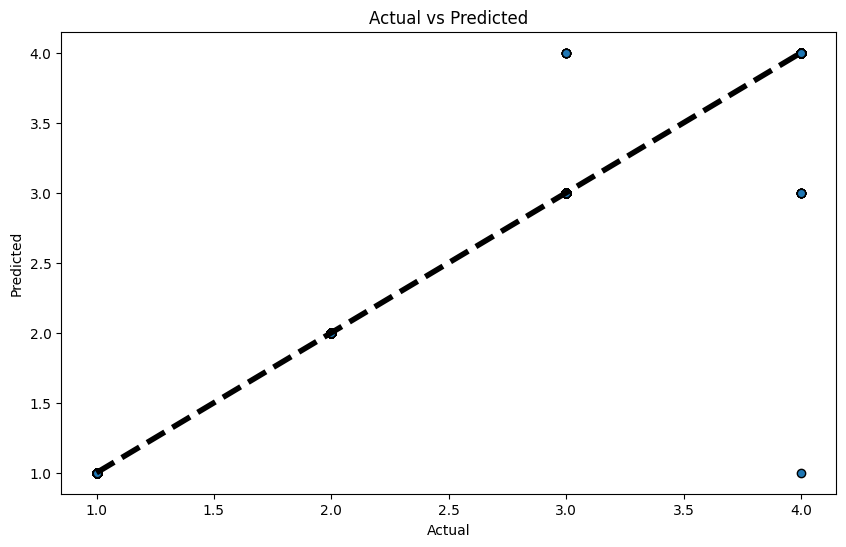

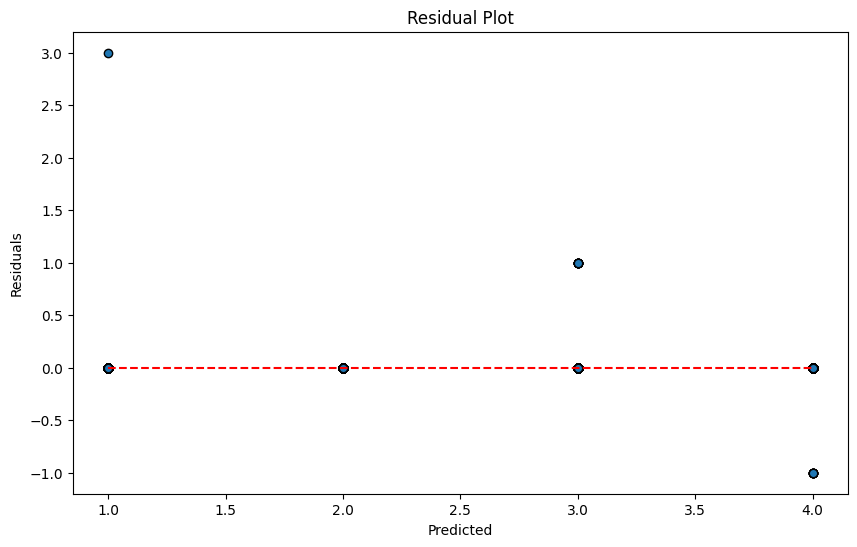

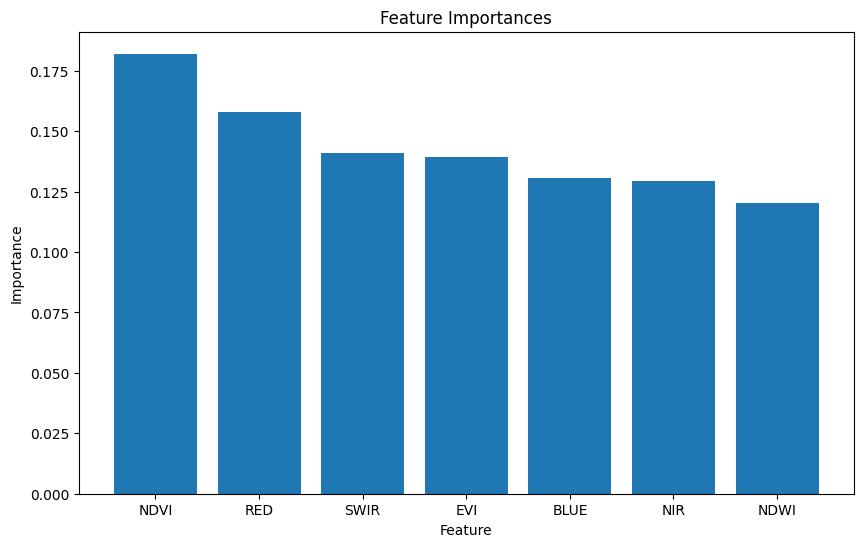

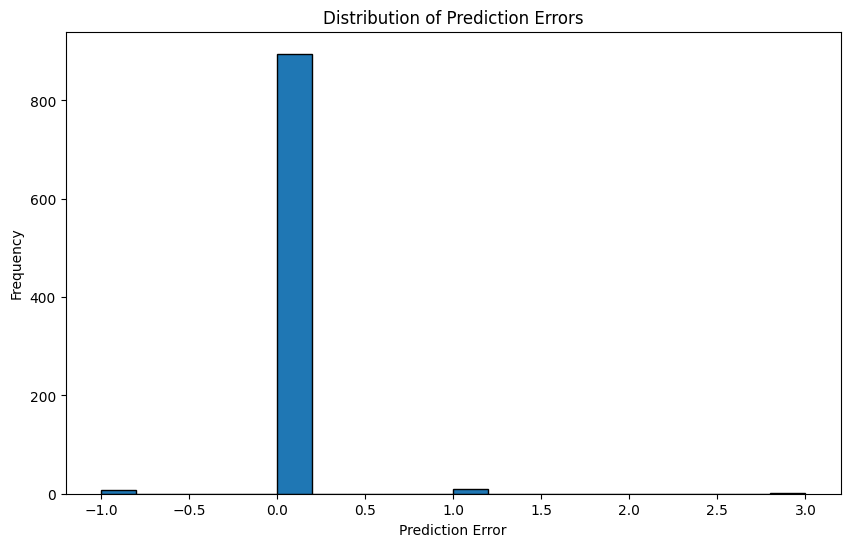

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your full dataset
# Concatenate X and y to handle NaNs together
data = pd.concat([X, y], axis=1)

# Remove rows with NaN values
data = data.dropna()

# Split the cleaned dataset back into X and y
X = data.drop(columns=y.name)
y = data[y.name]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier with the cleaned data
clf.fit(X_train[['SWIR', 'RED', 'NIR', 'NDWI', 'NDVI', 'EVI', 'BLUE']], y_train)

# Make predictions
y_pred = clf.predict(X_test[['SWIR', 'RED', 'NIR', 'NDWI', 'NDVI', 'EVI', 'BLUE']])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate R², MAE, and RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plotting feature importances
importances = clf.feature_importances_
feature_names = ['SWIR', 'RED', 'NIR', 'NDWI', 'NDVI', 'EVI', 'BLUE']
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Plotting the distribution of prediction errors
errors = residuals
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

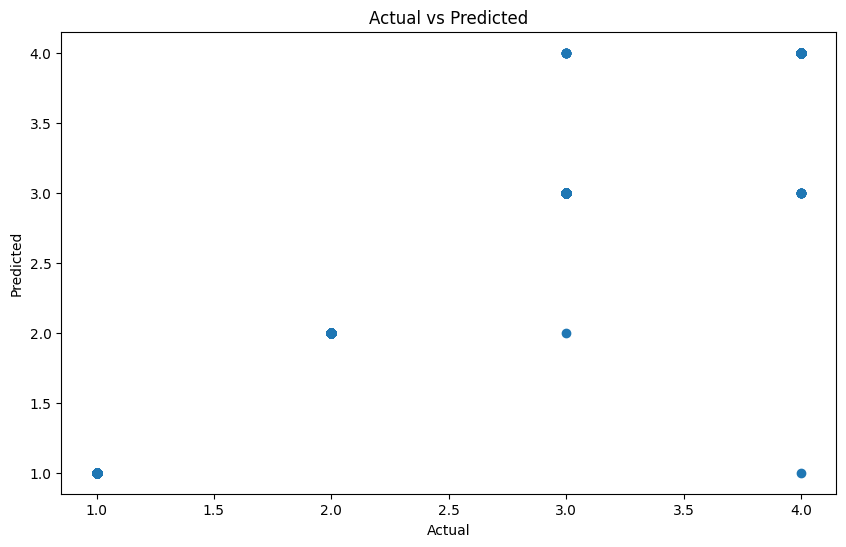

In [46]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [44]:
y_test


OBJECTID
5892.0    1.0
3449.0    3.0
6797.0    1.0
4837.0    4.0
5415.0    1.0
         ... 
4322.0    4.0
121.0     2.0
5815.0    1.0
5497.0    1.0
6087.0    1.0
Name: Class_ID, Length: 912, dtype: float64

In [39]:
y_pred

array([1., 3., 1., 4., 1., 1., 2., 2., 1., 3., 2., 1., 3., 2., 2., 4., 3.,
       1., 1., 4., 3., 3., 3., 2., 1., 2., 2., 4., 3., 4., 2., 1., 1., 3.,
       3., 1., 1., 2., 1., 3., 2., 2., 4., 1., 1., 4., 1., 2., 4., 2., 3.,
       4., 1., 2., 2., 4., 4., 4., 1., 3., 3., 3., 4., 4., 4., 4., 3., 3.,
       3., 4., 4., 2., 4., 2., 1., 1., 1., 4., 2., 3., 1., 1., 1., 2., 4.,
       3., 1., 4., 4., 2., 1., 3., 4., 4., 3., 4., 3., 2., 4., 1., 3., 4.,
       3., 4., 1., 4., 3., 1., 1., 3., 2., 3., 3., 3., 2., 4., 3., 1., 1.,
       1., 4., 2., 1., 2., 1., 3., 1., 1., 2., 4., 2., 4., 1., 4., 4., 3.,
       1., 4., 1., 3., 4., 3., 3., 1., 2., 1., 1., 1., 4., 3., 1., 2., 2.,
       4., 1., 1., 4., 4., 4., 4., 4., 4., 2., 2., 3., 4., 1., 1., 4., 2.,
       1., 2., 3., 2., 2., 4., 3., 4., 1., 1., 2., 3., 1., 1., 1., 3., 4.,
       1., 1., 4., 2., 1., 1., 1., 4., 3., 4., 1., 1., 1., 2., 1., 1., 3.,
       1., 1., 1., 1., 4., 2., 2., 2., 4., 3., 3., 4., 1., 3., 1., 2., 3.,
       1., 2., 1., 2., 3.

In [78]:
path_ndwi="D:/Jintu/Jintu_LULC/13Dec_2023/NDWI/NDWI_Landsat_1990_01_NDWI.tif.tif"
path_ndvi="D:/Jintu/Jintu_LULC/13Dec_2023/NDVI/NDVI_Landsat_1990_01_NDVI.tif.tif"
path_evi="D:/Jintu/Jintu_LULC/13Dec_2023/EVI/EVI_Landsat_1990_01_EVI.tif.tif"
path_nir="D:/Jintu/Jintu_LULC/13Dec_2023/NIR/Landsat_Landsat_1990_01_NIR.tif.tif"
path_red="D:/Jintu/Jintu_LULC/13Dec_2023/RED/Landsat_Landsat_1990_01_RED.tif.tif"
path_blue="D:/Jintu/Jintu_LULC/13Dec_2023/BLUE/Landsat_Landsat_1990_01_BLUE.tif.tif"
path_swir="D:/Jintu/Jintu_LULC/13Dec_2023/SWIR/Landsat_Landsat_1990_01_SWIR.tif.tif"
path_corr="D:/Jintu/Jintu_LULC/13Dec_2023/CORRELATION/GLCM_correlation_1990.tif.tif"
path_diss="D:/Jintu/Jintu_LULC/13Dec_2023/DISSIMILARITY/GLCM_dissimilarity_1990.tif.tif"
path_cont="D:/Jintu/Jintu_LULC/13Dec_2023/CONTRAST/GLCM_contrast_1990.tif.tif"
path_asp="D:/Jintu/Jintu_LULC/TestDL_3/Landsat Images/Bands/SRTM_Aspect.tif.tif"
path_elv="D:/Jintu/Jintu_LULC/TestDL_3/Landsat Images/Bands/SRTM_DEM.tif.tif"
path_slp="D:/Jintu/Jintu_LULC/TestDL_3/Landsat Images/Bands/SRTM_Slope.tif.tif"
path_ti="D:/Jintu/Jintu_LULC/TestDL_3/Landsat Images/Bands/fcd_output/ti.tif"
path_bsi="D:/Jintu/Jintu_LULC/TestDL_3/Landsat Images/Bands/fcd_output/bsi.tif"
path_csi="D:/Jintu/Jintu_LULC/TestDL_3/Landsat Images/Bands/fcd_output/csi.tif"
path_fcd="D:/Jintu/Jintu_LULC/TestDL_3/Landsat Images/Bands/fcd_output/fcd.tif"
path_avi="D:/Jintu/Jintu_LULC/TestDL_3/Landsat Images/Bands/fcd_output/avi.tif"

In [1]:
# Read NDWI data
with rasterio.open(path_ndwi) as ndwi_ds:
    ndwi_data = ndwi_ds.read(1)  # Assuming you want the first band

# Read NDVI data
with rasterio.open(path_ndvi) as ndvi_ds:
    ndvi_data = ndvi_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_evi) as evi_ds:
    evi_data = evi_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_nir) as nir_ds:
    nir_data = nir_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_red) as red_ds:
    red_data = red_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_blue) as blue_ds:
    blue_data = blue_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_swir) as swir_ds:
    swir_data = swir_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_corr) as corr_ds:
    corr_data = corr_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_diss) as diss_ds:
    diss_data = diss_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_cont) as cont_ds:
    cont_data = cont_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_slp) as slp_ds:
    slp_data = slp_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_elv) as elv_ds:
    elv_data = elv_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_asp) as asp_ds:
    asp_data = asp_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_ti) as ti_ds:
    ti_data = ti_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_bsi) as bsi_ds:
    bsi_data = bsi_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_csi) as csi_ds:
    csi_data = csi_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_fcd) as fcd_ds:
    fcd_data = fcd_ds.read(1)  # Assuming you want the first band
    
# Read NDVI data
with rasterio.open(path_avi) as avi_ds:
    avi_data = avi_ds.read(1)  # Assuming you want the first band


NameError: name 'rasterio' is not defined

In [80]:
print(fcd_data.shape)

(1321, 2881)


In [81]:
# Create a DataFrame
df = pd.DataFrame({
    'NDWI': ndwi_data.ravel(),
    'NDVI': ndvi_data.ravel(),
    'EVI': evi_data.ravel(),
    'BLUE': blue_data.ravel(),
    'RED': red_data.ravel(),
    'NIR': nir_data.ravel(),
    'SWIR': swir_data.ravel(),
    'Dissimilarity': diss_data.ravel(),
    'Contrast': cont_data.ravel(),
    'Correlation': corr_data.ravel(),
    'Aspect':asp_data.ravel(),
    'Slope':slp_data.ravel(),
    'Elevation':elv_data.ravel(),
    'BSI':bsi_data.ravel(),
    'CSI':csi_data.ravel(),
    'TI':ti_data.ravel(),
    'FCD':fcd_data.ravel(),
    'TI':ti_data.ravel(),
    'AVI':avi_data.ravel()
})

In [47]:
print(df)

             NDWI      NDVI       EVI      BLUE       RED       NIR      SWIR  \
0        0.266365  0.332023  0.115938  0.071132  0.034705  0.069205  0.040092   
1        0.374356  0.288194  0.083685  0.065207  0.031192  0.056449  0.025697   
2        0.292438  0.251901  0.074399  0.071132  0.031192  0.052198  0.028576   
3        0.282531  0.405056  0.162487  0.075082  0.034705  0.081960  0.045850   
4        0.200515  0.445475  0.189510  0.075082  0.034705  0.090464  0.060245   
...           ...       ...       ...       ...       ...       ...       ...   
3805796  0.376071  0.064633  0.045461  0.127645  0.092438  0.105213  0.047705   
3805797  0.470022  0.026270  0.017633  0.125711  0.095877  0.101051  0.036431   
3805798  0.412123  0.026270  0.017633  0.125711  0.095877  0.101051  0.042068   
3805799  0.376071  0.028831  0.019820  0.127645  0.099316  0.105213  0.047705   
3805800  0.327149  0.028831  0.020214  0.129578  0.099316  0.105213  0.053342   

         Dissimilarity  Con

In [36]:
#to check where is the nan value

In [82]:
import pandas as pd

# Assuming your DataFrame is named df
nan_values = df.isna()

# To count the number of NaN values in each column
nan_counts = df.isna().sum()

# To display the rows where NaN values are present
rows_with_nan = df[df.isna().any(axis=1)]

# To display the columns where NaN values are present
columns_with_nan = df.columns[df.isna().any()]

# To display the specific locations of NaN values
nan_locations = df[df.isna().any(axis=1)][columns_with_nan]

# Print or inspect the results
print("NaN values in the DataFrame:")
print(nan_values)
print("\nCounts of NaN values in each column:")
print(nan_counts)
print("\nRows with NaN values:")
print(rows_with_nan)
print("\nColumns with NaN values:")
print(columns_with_nan)
print("\nLocations of NaN values:")
print(nan_locations)



NaN values in the DataFrame:
          NDWI   NDVI    EVI   BLUE    RED    NIR   SWIR  Dissimilarity  \
0        False  False  False  False  False  False  False           True   
1        False  False  False  False  False  False  False           True   
2        False  False  False  False  False  False  False           True   
3        False  False  False  False  False  False  False           True   
4        False  False  False  False  False  False  False           True   
...        ...    ...    ...    ...    ...    ...    ...            ...   
3805796  False  False  False  False  False  False  False           True   
3805797  False  False  False  False  False  False  False           True   
3805798  False  False  False  False  False  False  False           True   
3805799  False  False  False  False  False  False  False           True   
3805800  False  False  False  False  False  False  False           True   

         Contrast  Correlation  Aspect  Slope  Elevation    BSI    CSI

In [13]:
#if there any nan value

In [83]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with the desired strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your DataFrame
df[['NDVI', 'NDWI','RED','NIR','EVI','SWIR','BLUE','Contrast','Correlation','Dissimilarity','Slope','Aspect']] = imputer.fit_transform(df[['NDVI', 'NDWI','RED','NIR','EVI','SWIR','BLUE','Contrast','Correlation','Dissimilarity','Slope','Aspect']])

In [84]:
op_img = clf.predict(df[['NDVI', 'NDWI','RED','NIR','EVI','SWIR','BLUE','Contrast','Correlation','Dissimilarity','Slope','Aspect']])

In [85]:
op_img=op_img.reshape(1321, 2881)

In [16]:
print(op_img.shape)

(1321, 2881)


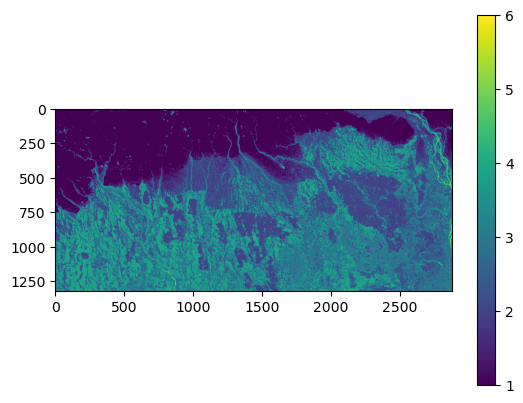

In [70]:
plt.imshow(op_img)
plt.colorbar()

C:\Users\mrg22-020914479\AppData\Local\Temp\ipykernel_13272\1903652935.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 6)  # You can use a different colormap if you prefer


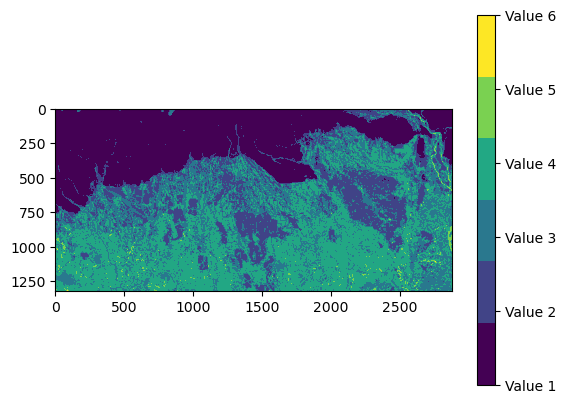

In [60]:
import matplotlib.pyplot as plt

# Create a colormap that maps values 1-5 to specific colors
cmap = plt.cm.get_cmap('viridis', 6)  # You can use a different colormap if you prefer

# Display the image with the custom colormap
plt.imshow(op_img, cmap=cmap)

# Add a color bar to show the mapping of values to colors
colorbar = plt.colorbar()
colorbar.set_ticks([1, 2, 3, 4, 5,6])  # Set the tick locations to match your values
colorbar.set_ticklabels(['Value 1', 'Value 2', 'Value 3', 'Value 4', 'Value 5','Value 6'])  # Set tick labels

# Show the plot
plt.show()

In [86]:
import rasterio
from rasterio import Affine

# Define the output GeoTIFF file path
output_path = "D:/Jintu/Jintu_LULC/13Dec_2023/rf/rf_mask_5.tif"  # Replace with your desired file path

# Define the profile for the output GeoTIFF
# You can use the profile from one of the input files as a template
with rasterio.open(path_ndwi) as mask_ds:
    profile = mask_ds.profile

# Update the profile as needed for your output
# For example, you can update the data type, count, and nodata value
profile.update(
    dtype=rasterio.uint8,  # Change the data type if needed
    count=1,  # Set the number of bands
    nodata=None  # Set the nodata value if needed
)

# Write the output GeoTIFF
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(op_img.astype(rasterio.uint8), 1)  # Write the op_img array to the GeoTIFF

print(f"Saved output to {output_path}")


Saved output to D:/Jintu/Jintu_LULC/13Dec_2023/rf/rf_mask_5.tif
